#### Problem Statement
#### Build a model which predicts sales based on the money spent on different platforms for marketing.

#  Sales Prediction

## Importing Main libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Loading the Dataset

In [2]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# Showing first five rows
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Showing last five Rows
df.tail

<bound method NDFrame.tail of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
# showing no of rows in df
len(df)

200

## Clean data - Feature Engineering

In [6]:
# first we can check our data info by using info function:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# check columns in Data frame
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
# need columns name in single column
for i in df.columns:
     print(i)

TV
Radio
Newspaper
Sales


# Exploratory data analysis

In [9]:
# Showing total numbers of rows and columns in DataFrame
df.shape

(200, 4)

In [10]:
# Total numbers of Rows in DataFrame
df.shape[0]

200

In [11]:
# Total numbers of Columns in DataFrame
df.shape[1]

4

In [12]:
# Total numbers of elements in DataFrame
df.size

800

In [13]:
# First we can describe our data by using describe() function
# using this function we can simply find [count,mean,std,min,25%,50%,75%,max]

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
# checking missinf values in Dataframe
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
# Showing columns wise count of element by using count()
df.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [16]:
# showing number of unique values in dataframe
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [17]:
# dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe 
# it is ignored.

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Data Visualization

##### Now we can find correlations between X and y variabls .
##### In X variabls we have independent variables(Features) and in y variable we have dependent variables (Target).
##### We can change this corr table into a graph usng seaborn heatmap through for simply understanding.¶

<Axes: >

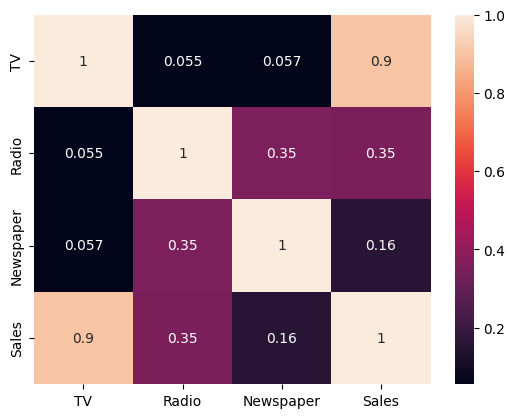

In [18]:
sns.heatmap(df.corr(),annot=True)

# now you can simple check out correlation between X and y variables:

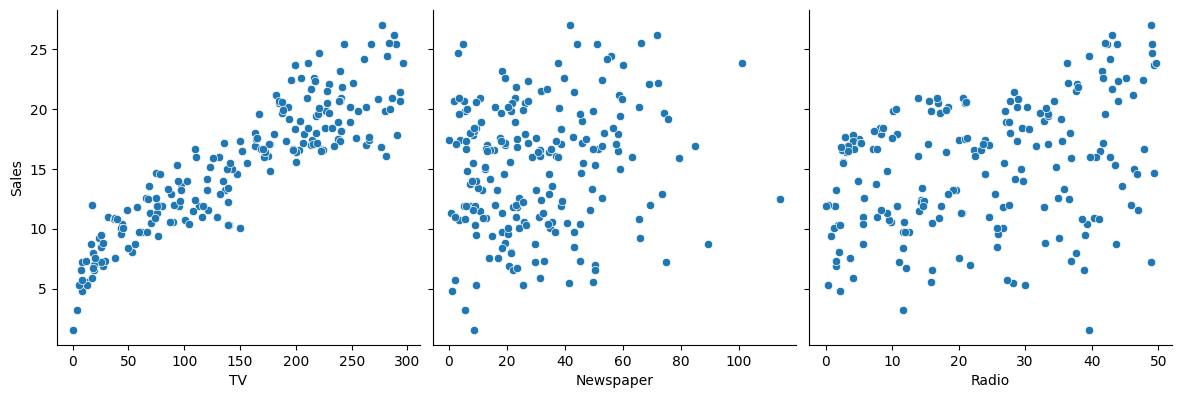

In [19]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

##### As u can see ["TV"] are strongly correlated with dependent variable - 'Sales '

<Axes: xlabel='TV', ylabel='Density'>

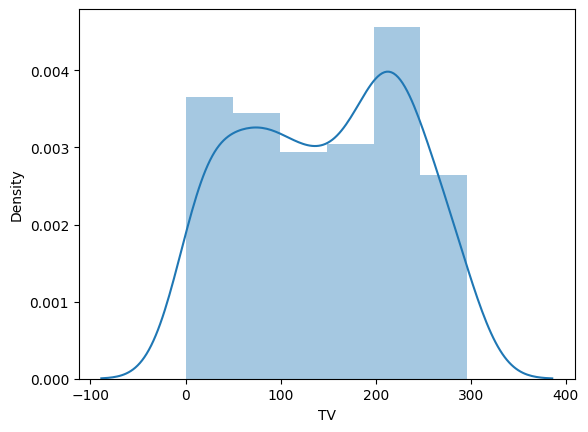

In [20]:
sns.distplot(df['TV'])

## TV VS Sales

<Axes: xlabel='TV', ylabel='Sales'>

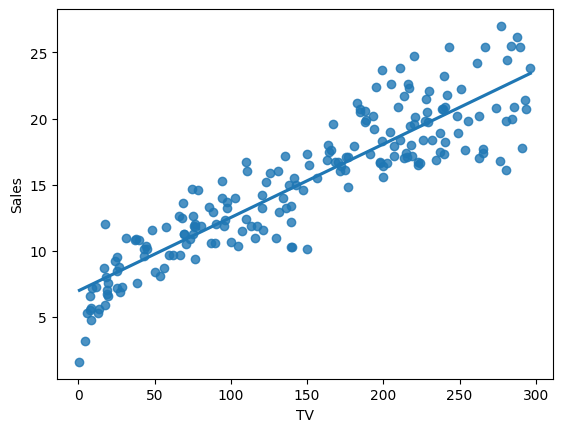

In [21]:
sns.regplot(x='TV',y='Sales',data=df,ci=None)

##### now we can use these columns in model for Sales prediction

## Creating a LinearRegression Model

### Data Prepration

In [22]:
X=df[['TV']]
y=df[['Sales']]

In [23]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [24]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


### Splitting The Data 

In [25]:
# Split data for test and train the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Model Creation

In [26]:
# LinearRegression model creation
model=LinearRegression()

### Model Training

In [27]:
# by using fit() method we can train our model
model.fit(X_train,y_train)

LinearRegression()

### Model Prediction

In [28]:
# By using predict() method we can predict y model 
y_predict=model.predict(X_test)

In [29]:
y_predict[:10]

array([[10.93127621],
       [ 9.88042193],
       [12.09159447],
       [22.99968079],
       [16.45920756],
       [10.21976029],
       [ 7.6199906 ],
       [20.28497391],
       [ 8.4464437 ],
       [17.95886418]])

## Find Model Acuracy : Evaluating the performance¶

#### First we can compare y_predict and y_test

In [30]:
# y predict
y_predict[:10]

array([[10.93127621],
       [ 9.88042193],
       [12.09159447],
       [22.99968079],
       [16.45920756],
       [10.21976029],
       [ 7.6199906 ],
       [20.28497391],
       [ 8.4464437 ],
       [17.95886418]])

In [31]:
# y_test
y_test[:10]

,Sales
18,11.3
170,8.4
107,12.0
98,25.4
177,16.7
182,8.7
5,7.2
146,18.2
12,9.2
152,16.6


In [32]:
 from sklearn import metrics
# we can use this for find evaluating the performance

In [33]:
metrics.mean_absolute_error(y_test,y_predict)

1.8639438916550555

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
np.sqrt(mean_squared_error(y_test, y_predict))

2.3599871172248466

In [36]:
from sklearn.metrics import r2_score

In [37]:
r_squared = r2_score(y_test, y_predict)
r_squared

0.8150168765722069